Dynamic programming

連結google drive

In [122]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive') # 此處需要登入google帳號
# 獲取授權碼之後輸入即可連動雲端硬碟
#data = pd.read_csv("/content/gdrive/My Drive/已存在google雲端的檔名")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [123]:
#查看data資料夾
import os
print(os.listdir('./gdrive/MyDrive/陳煥作業/3/data'))

['p07_c.txt', 'p07_w.txt', 'p07_p.txt', 'p07_s.txt']


In [124]:
#read capacity file
capacity=0
with open("./gdrive/MyDrive/陳煥作業/3/data/p07_c.txt", "r") as file:
    readline=file.read().strip()
    print(readline)
    capacity=int(readline)
#read weights file
weights=[]
with open("./gdrive/MyDrive/陳煥作業/3/data/p07_w.txt", "r") as file:
    weights=file.read().splitlines()
    weights=[int(x) for x in weights]
    print(weights)
#read profits file
profits=[]
with open("./gdrive/MyDrive/陳煥作業/3/data/p07_p.txt", "r") as file:
    profits=file.read().splitlines()
    profits=[int(x) for x in profits]
    print(profits)
#read optimal selection file
optimal_selection=[]
with open("./gdrive/MyDrive/陳煥作業/3/data/p07_s.txt", "r") as file:
    optimal_selection=file.read().splitlines()
    optimal_selection=[int(x) for x in optimal_selection]
    print(optimal_selection)
#number of elements
n=len(profits)

750
[70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]
[135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]


dynamic programming

In [125]:
def knapSack(capacity,weights,profits,n):
  K=[[0 for x in range(capacity+1)] for x in range(n+1)]
  #build table K[][] in buttom up manner
  for i in range(n+1):
    for c in range(capacity+1):
      if (i==0) or (c==0):#當i=0或c=0
        K[i][c]=0
      elif (weights[i-1]<=c):#當第i個物品拿得起
        K[i][c]=max(profits[i-1]+K[i-1][c-weights[i-1]],K[i-1][c])#拿或不拿
      else:#當第i個物品拿不動
        K[i][c]=K[i-1][c]
  return K[n][capacity]

In [126]:
print(knapSack(capacity,weights,profits,n))

1458


Hill climbing

In [127]:
#計算傳入狀態的總價值
def profits_of_state(state):
  total_weights=0
  total_profits=0
  for i in range(n):
    if state[i]==1:
      total_weights+=weights[i]
      total_profits+=profits[i]
  if total_weights>capacity:  #如果超過承受重量則回傳-1
    return -1
  else:  #否則回傳總價值
    return total_profits

In [128]:
#找出neighbors
def find_neighbors(current_state):
  neighbors=[]
  #每個位置都分別置換
  for i in range(n):
    neighbor_state=current_state.copy()
    #改變第i個元素
    if neighbor_state[i]==0:
      neighbor_state[i]=1
    else:
      neighbor_state[i]=0
    #檢查有沒有超重，若無超重則加入neighbor
    if profits_of_state(neighbor_state)!=-1:
      neighbors.append(neighbor_state)
  return neighbors

In [129]:
#產生隨機initial state
#1為拿，0為不拿
import random
initial_state=[random.randint(0,1)for x in range(n)]#產生隨機initial state
while(profits_of_state(initial_state)==-1):#當超過負重時重新產生initial state
  initial_state=[random.randint(0,1)for x in range(n)]
print(initial_state)

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [130]:
current_state=initial_state
evalution=[]
for i in range(500):
  neighbors=find_neighbors(current_state)
  next_profits=-1
  next_state=None
  #檢查所有鄰居，找出最好的鄰居
  for neighbor in neighbors:
    if profits_of_state(neighbor)>next_profits:
      next_state=neighbor
      next_profits=profits_of_state(neighbor)
  #如果最好的鄰居比原本的狀態還要好，則替換
  if next_profits>profits_of_state(current_state):
    current_state=next_state
  evalution.append(profits_of_state(current_state))
print(profits_of_state(current_state))

1426


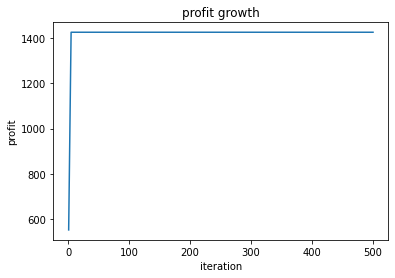

In [131]:
#印出迭代圖
import matplotlib.pyplot as plt
plt.plot(range(1,501),evalution)
plt.title('profit growth')
plt.ylabel('profit')
plt.xlabel('iteration')
plt.show()

simulated annealing

In [132]:
import random
#找出隨機一個neighbor
def find_neighbor(current_state):
  #隨機置換一個位置
  i=random.randint(0,n-1)
  while(True):
    neighbor_state=current_state.copy()
    #改變第i個元素
    if neighbor_state[i]==0:
      neighbor_state[i]=1
    else:
      neighbor_state[i]=0
    #檢查有沒有超重，若無超重則回傳neighbor_state
    if profits_of_state(neighbor_state)!=-1:
      return neighbor_state
    i=random.randint(0,n-1)

In [133]:
#計算退火機率值
from math import e
def acceptance(new_profit,current_profit,T):
  return e**((new_profit-current_profit)/T)

In [134]:
#產生隨機initial state
#1為拿，0為不拿
import random
initial_state=[random.randint(0,1)for x in range(n)]#產生隨機initial state
while(profits_of_state(initial_state)==-1):#當超過負重時重新產生initial state
  initial_state=[random.randint(0,1)for x in range(n)]
print(initial_state)

[0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]


In [135]:
import random
T=1000#初始溫度
current_state=initial_state#初始狀態
current_profit=profits_of_state(current_state)#初始能量
evalution=[]
for i in range(500):
  neighbor=find_neighbor(current_state)#鄰近狀態
  neighbor_profit=profits_of_state(neighbor)#鄰近狀態能量
  if random.random()<=acceptance(neighbor_profit,current_profit,T):#若隨機值小於允許的機率，則可更新狀態
    current_state=neighbor
    current_profit=neighbor_profit
  T=T*0.99#降溫
  evalution.append(current_profit)
print(current_profit)

1397


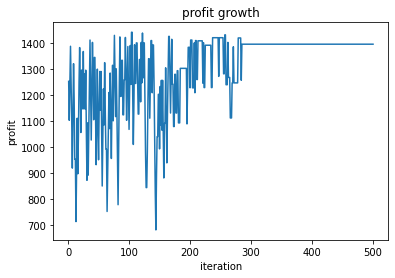

In [136]:
#印出迭代圖
import matplotlib.pyplot as plt
plt.plot(range(1,501),evalution)
plt.title('profit growth')
plt.ylabel('profit')
plt.xlabel('iteration')
plt.show()